In [1]:
import os
from dotenv import load_dotenv
import requests
import pandas as pd



#### Spotify Token
1. Get Auth for App
- Client_ID
- Client_Secret


2. Get Auth for queries
- token

In [2]:
def save_token():
    load_dotenv('../.env')
    CLIENT_ID = os.environ.get('CLIENT_ID')
    CLIENT_SECRET = os.environ.get('CLIENT_SECRET')
    command = f"""echo "CLIENT_ID='{CLIENT_ID}'\nCLIENT_SECRET='{CLIENT_SECRET}'" > .env"""
    os.system(command)

In [3]:
def spotify_token ():
    
    """This function refreshes a 'queries token' for a given app on Spotify.
    queries token are refreshed every 3600 seconds
    returns: token as a string
    """

    # 1. Defining: credentials fot the app
    
    CLIENT_ID = os.getenv("CLIENT_ID")
    CLIENT_SECRET = os.getenv("CLIENT_SECRET")
    
    #2. Request
    
    body_params = {"grant_type":"client_credentials"}
    url = "https://accounts.spotify.com/api/token"
    response = requests.post(url, data=body_params, auth=(CLIENT_ID,CLIENT_SECRET))
    
    try:
        token = response.json()["access_token"]
        return token

    except:
        print("The request did not go through. Maybe check credentials?")

In [4]:
token = spotify_token()
token

'BQBeY4kx_nnHB5DkNu_cPykICD3zeDz9BsbAm8G9G9J454fXY9Ct3P10zPW_Sy7f5-3QkoQQf6emRgd6_VKG3whuXURqPCEchpCuZ6l8nPSwdqaUPRUx'

In [5]:
#token
headers = {"Authorization":f"Bearer {token}", 
            
}

#### Get Mood Playlists

1. url_base: core api url. 

2. select mood playlists for sentiments/moods:
    > happy (smile) </br>
    > sad (sad face) </br>
    > flerty (wink) </br>
    > neutral (normal face) </br>
    > angry (frown, lip-up) 

3. [get playlists items from api](https://developer.spotify.com/console/get-playlist-tracks/)
    > artist name, 
    > song name, 
    > song links, 
    > popularity, 

4. create mood column for each dictionary

5. merge all playlists into single dataset

In [6]:
url_base = 'https://api.spotify.com/v1/playlists/'

In [7]:
#query = f'https://api.spotify.com/v1/playlists/{playlist_id}/tracks'

In [8]:

angry = '78Gzl2X1zog4nGbm1qIdM9' #https://open.spotify.com/playlist/78Gzl2X1zog4nGbm1qIdM9
happy = '37i9dQZF1DXdPec7aLTmlC' #https://open.spotify.com/playlist/37i9dQZF1DXdPec7aLTmlC?si=edc1e3f30bdb400b&nd=1
happy_2 = '37i9dQZF1DX2sUQwD7tbmL' #https://open.spotify.com/playlist/37i9dQZF1DX2sUQwD7tbmL?si=9a88891af3d94949&nd=1
sad = '37i9dQZF1DX3YSRoSdA634' #https://open.spotify.com/playlist/37i9dQZF1DX3YSRoSdA634?si=b63116e34e2b477f&nd=1
flerty = '37i9dQZF1DXdl6IPOySdX4' #https://open.spotify.com/playlist/37i9dQZF1DXdl6IPOySdX4?si=2c03e0f3491d469c&nd=1
neutral = '37i9dQZF1DX9RwfGbeGQwP' #https://open.spotify.com/playlist/37i9dQZF1DX9RwfGbeGQwP?si=29429fc4344547e0&nd=1
happy_3 = '37i9dQZF1DX7KNKjOK0o75' #https://open.spotify.com/playlist/37i9dQZF1DX7KNKjOK0o75?si=aba506e2739443c0&nd=1




In [9]:
def get_playlist (playlist_id):
    token = spotify_token()
    headers = {"Authorization":f"Bearer {token}"}

    
    
    query = f'https://api.spotify.com/v1/playlists/{playlist_id}/tracks'
        
    try:    
        return requests.get(query, headers=headers).json()
    except:
        token = spotify_token()
        return requests.get(query, headers=headers).json()

In [10]:
get_playlist('78Gzl2X1zog4nGbm1qIdM9')

{'href': 'https://api.spotify.com/v1/playlists/78Gzl2X1zog4nGbm1qIdM9/tracks?offset=0&limit=100',
 'items': [{'added_at': '2022-01-28T02:53:05Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/22addb47ii2lsy2mafmln2pdi'},
    'href': 'https://api.spotify.com/v1/users/22addb47ii2lsy2mafmln2pdi',
    'id': '22addb47ii2lsy2mafmln2pdi',
    'type': 'user',
    'uri': 'spotify:user:22addb47ii2lsy2mafmln2pdi'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_group': 'album',
     'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5v2WhpA59TJSdPh7LCx1lN'},
       'href': 'https://api.spotify.com/v1/artists/5v2WhpA59TJSdPh7LCx1lN',
       'id': '5v2WhpA59TJSdPh7LCx1lN',
       'name': 'BONES',
       'type': 'artist',
       'uri': 'spotify:artist:5v2WhpA59TJSdPh7LCx1lN'}],
     'available_markets': ['AD',
      'AE',
      'AG',
      'AL',
      'AM',
      'AO',
      'AR',
      '

In [11]:
 #'track': {'album': {'album_type': 'album',
   #  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5v2WhpA59TJSdPh7LCx1lN'},
    #   'href': 'https://api.spotify.com/v1/artists/5v2WhpA59TJSdPh7LCx1lN',
    #   'id': '5v2WhpA59TJSdPh7LCx1lN',
     #  'name': 'BONES',
     #  'type': 'artist',

In [12]:
def get_playlist(playlist_id):
    token = spotify_token()
    headers = {"Authorization":f"Bearer {token}"}
    query = f'https://api.spotify.com/v1/playlists/{playlist_id}/tracks'
        
    try:    
        return requests.get(query, headers=headers).json()
    except:
        token = spotify_token()
        return requests.get(query, headers=headers).json()

# Dictionary that maps playlist ids to labels
playlist_labels = {
    '78Gzl2X1zog4nGbm1qIdM9': 'angry',
    '37i9dQZF1DXdPec7aLTmlC': 'happy',
    '37i9dQZF1DX2sUQwD7tbmL': 'happy',
    '37i9dQZF1DX3YSRoSdA634': 'sad',
    #'37i9dQZF1DXdl6IPOySdX4': 'flerty',
    '37i9dQZF1DX9RwfGbeGQwP': 'neutral',
    '37i9dQZF1DX7KNKjOK0o75': 'happy',
    '37i9dQZF1DX9XIFQuFvzM4': 'happy',
    '37i9dQZF1DXcNb6Ba0LuVc': 'happy',
    '37i9dQZF1DWXahxq4Q8el6': 'happy',
    '37i9dQZF1DWX83CujKHHOn': 'sad',
   # 'i9dQZF1DX15JKV0q7shD': 'sad', #playlist giving error
    '37i9dQZF1DWVxpHBekDUXK': 'sad',
    '37i9dQZF1DWTXGqmP0bfT3': 'angry',
    '37i9dQZF1DWXNFSTtym834': 'angry',
    '4cZyqt0YjuGSTA3RTD9FFB': 'angry',
    '6NWXMxJsJ10JBPcmh0D0Hq': 'angry'


 }

# Loop through the playlist ids and extract tracks information
tracks_info = []
for playlist_id, label in playlist_labels.items():
    response = get_playlist(playlist_id)
    if 'items' in response:
        tracks = response['items']
        while response['next']:
            response = requests.get(response['next'], headers=headers).json()
            tracks.extend(response['items'])
        for track in tracks:
            if track is not None and 'track' in track and track['track'] is not None and 'name' in track['track']:
                track_info = {
                    'playlist_id': playlist_id,
                    'label': label,
                    'track_name': track['track']['name'],
                    'artist_name': track['track']['artists'][0]['name'],
                    'album_name': track['track']['album']['name'],
                    'track_link': track['track']['external_urls']['spotify'],
                    'track_id': track['track']['id']           
                }
                tracks_info.append(track_info)
    else:
        print(f"Error with playlist {playlist_id}: {response}")


# Store the tracks information in a dataframe
df_tracks_info = pd.DataFrame(tracks_info)


In [13]:
df_tracks_info['label'].value_counts()

df_tracks_info.summary()

AttributeError: 'DataFrame' object has no attribute 'summary'

In [ ]:
df_tracks_info.to_csv('data/spotify_tracks.csv')


In [ ]:
df_tracks_info.sample(5)

,playlist_id,label,track_name,artist_name,album_name,track_link,track_id
2011,6NWXMxJsJ10JBPcmh0D0Hq,angry,The Anthem,Good Charlotte,The Young and The Hopeless,https://open.spotify.com/track/0BRHnOFm6sjxN1i...,0BRHnOFm6sjxN1i9LJrUDu
1091,37i9dQZF1DX7KNKjOK0o75,happy,Walking On Sunshine,Katrina & The Waves,Katrina & The Waves,https://open.spotify.com/track/05wIrZSwuaVWhcv...,05wIrZSwuaVWhcv5FfqeH0
1264,37i9dQZF1DXcNb6Ba0LuVc,happy,Call Me,Blues Trip,Call Me,https://open.spotify.com/track/1hc4YKpgFFFbK6Y...,1hc4YKpgFFFbK6YMuDXTnu
1535,37i9dQZF1DWX83CujKHHOn,sad,Summertime Sadness,Lana Del Rey,Born To Die – Paradise Edition (Special Version),https://open.spotify.com/track/1Ist6PR2BZR3n2z...,1Ist6PR2BZR3n2z2Y5R6S1
2031,6NWXMxJsJ10JBPcmh0D0Hq,angry,Drunk Girl,Something Corporate,Leaving Through The Window,https://open.spotify.com/track/6jiogyKd1hP4voI...,6jiogyKd1hP4voIGtp2oBx


In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

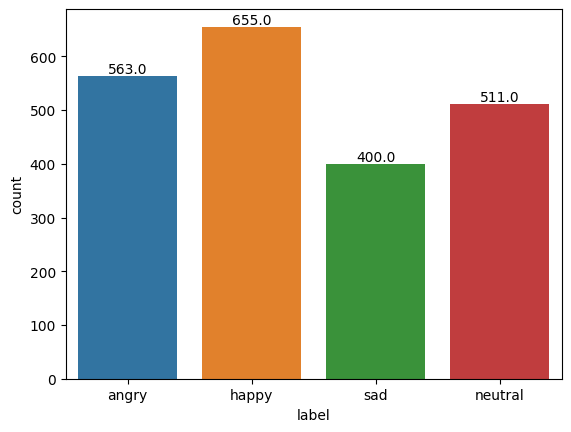

In [ ]:
sns.countplot(x=df_tracks_info['label'])
ax = plt.gca()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

In [ ]:
# Create a list of unique labels
labels = df_tracks_info['label'].unique()

# Loop through each label and create a boxplot
for label in labels:
    plt.figure()
    sns.boxplot(x='label', y='track_id', data=df_tracks_info[df_tracks_info['label'] == label])
    plt.title(f'Track Popularity for {label} Label')
    plt.xlabel('Label')
    plt.ylabel('Track ID')
    plt.show()

NameError: name 'df_tracks_info' is not defined